### Data Mining Project Jupyter File

### Submitted by: Deepti Agrawal

In [721]:
## Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [722]:
## Checking the current working directory
os.getcwd()

'D:\\GL\\DM'

In [723]:
##Changing the Working directory
os.chdir("D:\GL\DM")

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Q 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Data Description:
The data at hand contains bank users credit card usage activites.

### Domain:
Banking

### Attribute Information: 

- **spending**: Amount spent by the customer per month (in 1000s)
- **advance_payments**: Amount paid by the customer in advance by cash (in 100s)
- **probability_of_full_payment**: Probability of payment done in full by the customer to the bank
- **current_balance**: Balance amount left in the account to make purchases (in 1000s)
- **credit_limit**: Limit of the amount in credit card (10000s)
- **min_payment_amt** : minimum paid by the customer while making payments for purchases made monthly (in 100s)
- **max_spent_in_single_shopping**: Maximum amount spent in one purchase (in 1000s)

In [724]:
# reading the CSV file into pandas dataframe
bank_df = pd.read_csv("bank_marketing_part1_Data.csv")

In [725]:
#checking the head(top 10 rows) of the data frame
bank_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [726]:
#checking the tail(last 10 rows) of the data frame
bank_df.tail(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
203,11.55,13.10,0.8455,5.167,2.845,6.715,4.956
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


## Basic EDA
* Checking the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Finding the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [727]:
## Checking the number of rows and columns
bank_df.shape

(210, 7)

In [728]:
#checking the data types /information
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


- The data has 210 instances with 7 attributes all of float type.

In [729]:
#checking for missing values
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

- There are no null values in any of the columns.

In [730]:
# Are there any duplicates
duplicate = bank_df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

bank_df[duplicate]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [624]:
# five point summary of the continuous attributes
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


- The probability of customers doing full payment is high
- As observed, most customers have atleast 4000 to 6000 balance in their card.
- This particular data has users who have their card limit ranging between 30,000 to 40,000 approx.
- The max amount spent in single purchase is 5000 on an average.
- The min amount paid by customers in cash is 1200

### Data Visualization

#### Plots to see the distribution of the continuous features individually


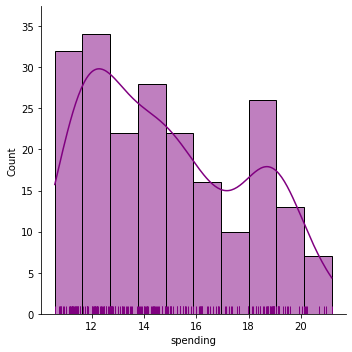

In [627]:
#Plot for Spending

sns.displot(bank_df['spending'], kde =True, rug =True, color ='purple', bins =10)

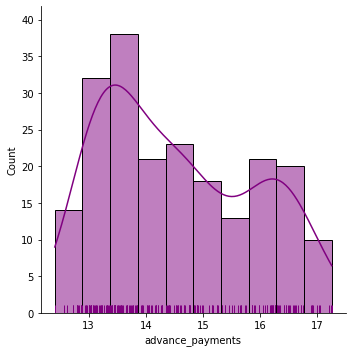

In [628]:
#Plot for Advance Payments

sns.displot(bank_df['advance_payments'], kde =True, rug =True, color ='purple', bins =10)

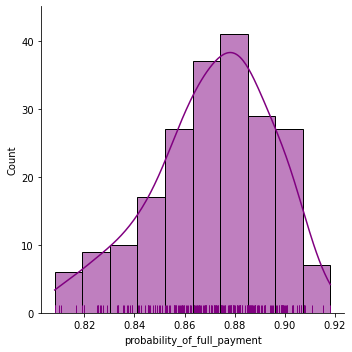

In [629]:
#Plot for Probability of Full Payment

sns.displot(bank_df['probability_of_full_payment'], kde =True, rug =True, color ='purple', bins =10)

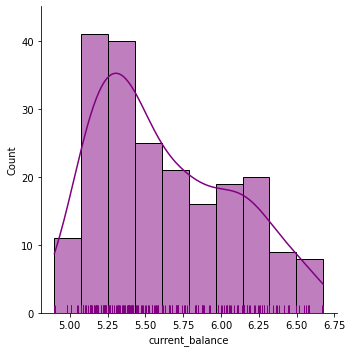

In [630]:
#Plot for Current Balance

sns.displot(bank_df['current_balance'], kde =True, rug =True, color ='purple', bins =10)

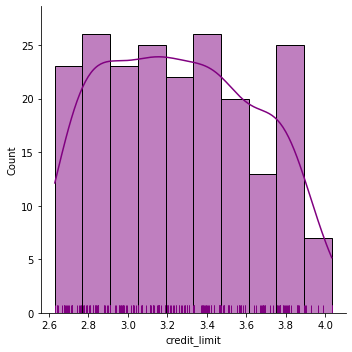

In [631]:
#Plot for Credit Limit

sns.displot(bank_df['credit_limit'], kde =True, rug =True, color ='purple', bins =10)

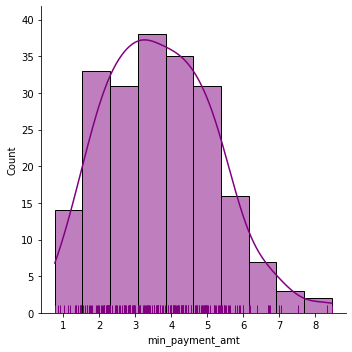

In [811]:
#Plot for Minimum Payment

sns.displot(bank_df['min_payment_amt'], kde =True, rug =True, color ='purple', bins =10)

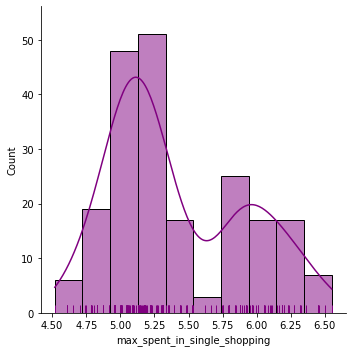

In [633]:
#Plot for Max spent in single shopping

sns.displot(bank_df['max_spent_in_single_shopping'], kde =True, rug =True, color ='purple', bins =10)

### Measure of Skewness

In [634]:
import scipy.stats as stats

In [635]:
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(bank_df.spending),stats.skew(bank_df.advance_payments),stats.skew(bank_df.probability_of_full_payment),stats.skew(bank_df.current_balance),stats.skew(bank_df.credit_limit),stats.skew(bank_df.min_payment_amt),stats.skew(bank_df.max_spent_in_single_shopping)]},
                        index=['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping'])  
Skewness

,Skewness
spending,0.397027
advance_payments,0.383806
probability_of_full_payment,-0.534104
current_balance,0.521721
credit_limit,0.133416
min_payment_amt,0.398793
max_spent_in_single_shopping,0.557876


### We will plot Boxplot to check outliers

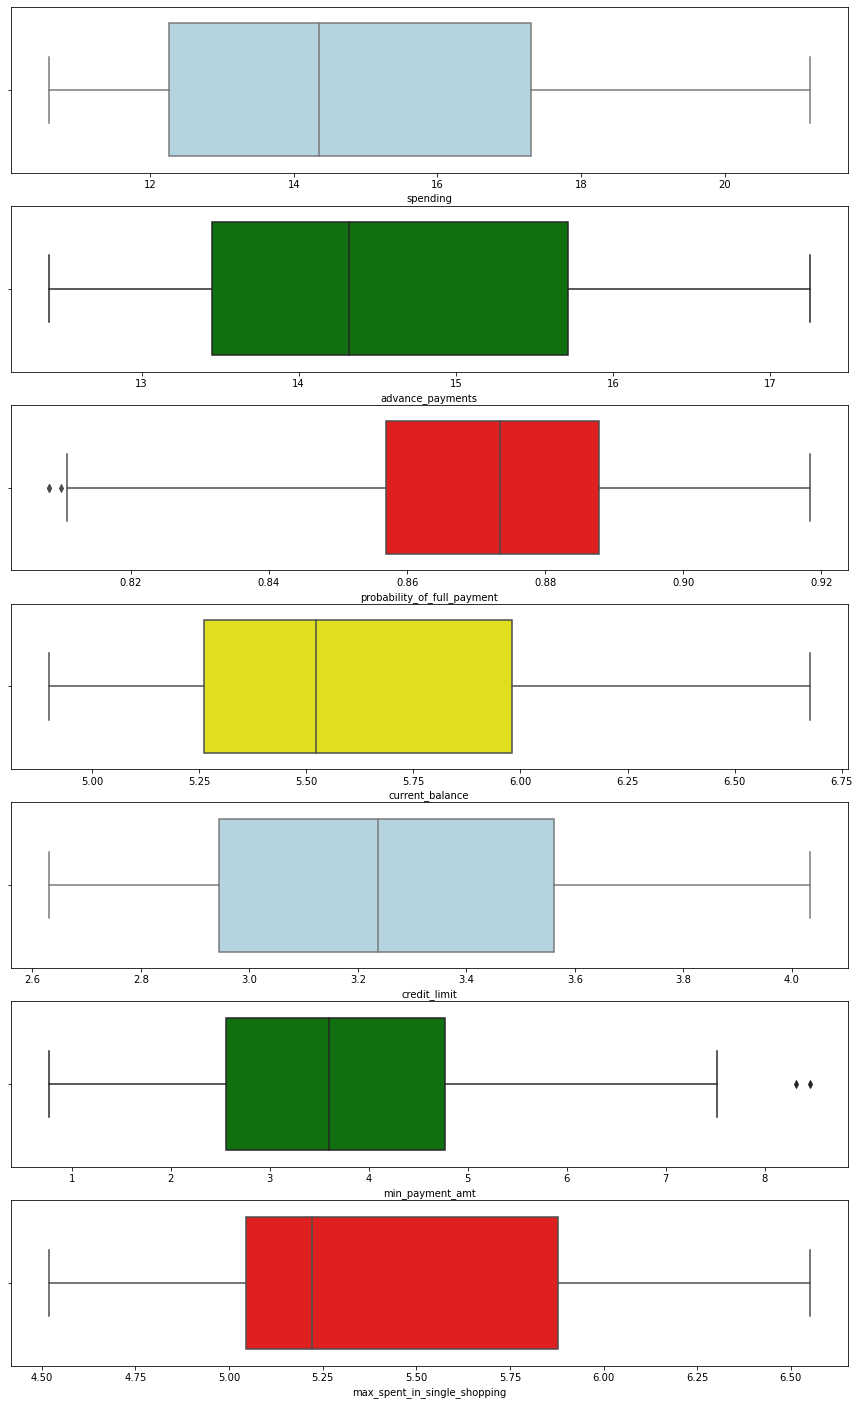

In [636]:
plt.figure(figsize =(15,25))
plt.subplot(7,1,1)
sns.boxplot(x =bank_df.spending, color = 'lightblue')

plt.subplot(7,1,2)
sns.boxplot(x =bank_df.advance_payments, color = 'green')

plt.subplot(7,1,3)
sns.boxplot(x =bank_df.probability_of_full_payment, color = 'red')

plt.subplot(7,1,4)
sns.boxplot(x =bank_df.current_balance, color = 'yellow')

plt.subplot(7,1,5)
sns.boxplot(x =bank_df.credit_limit, color = 'lightblue')

plt.subplot(7,1,6)
sns.boxplot(x =bank_df.min_payment_amt, color = 'green')

plt.subplot(7,1,7)
sns.boxplot(x =bank_df.max_spent_in_single_shopping, color = 'red')


plt.show()

- The attribute min_payment_amt and probability of full payment  has few outliers present to it.


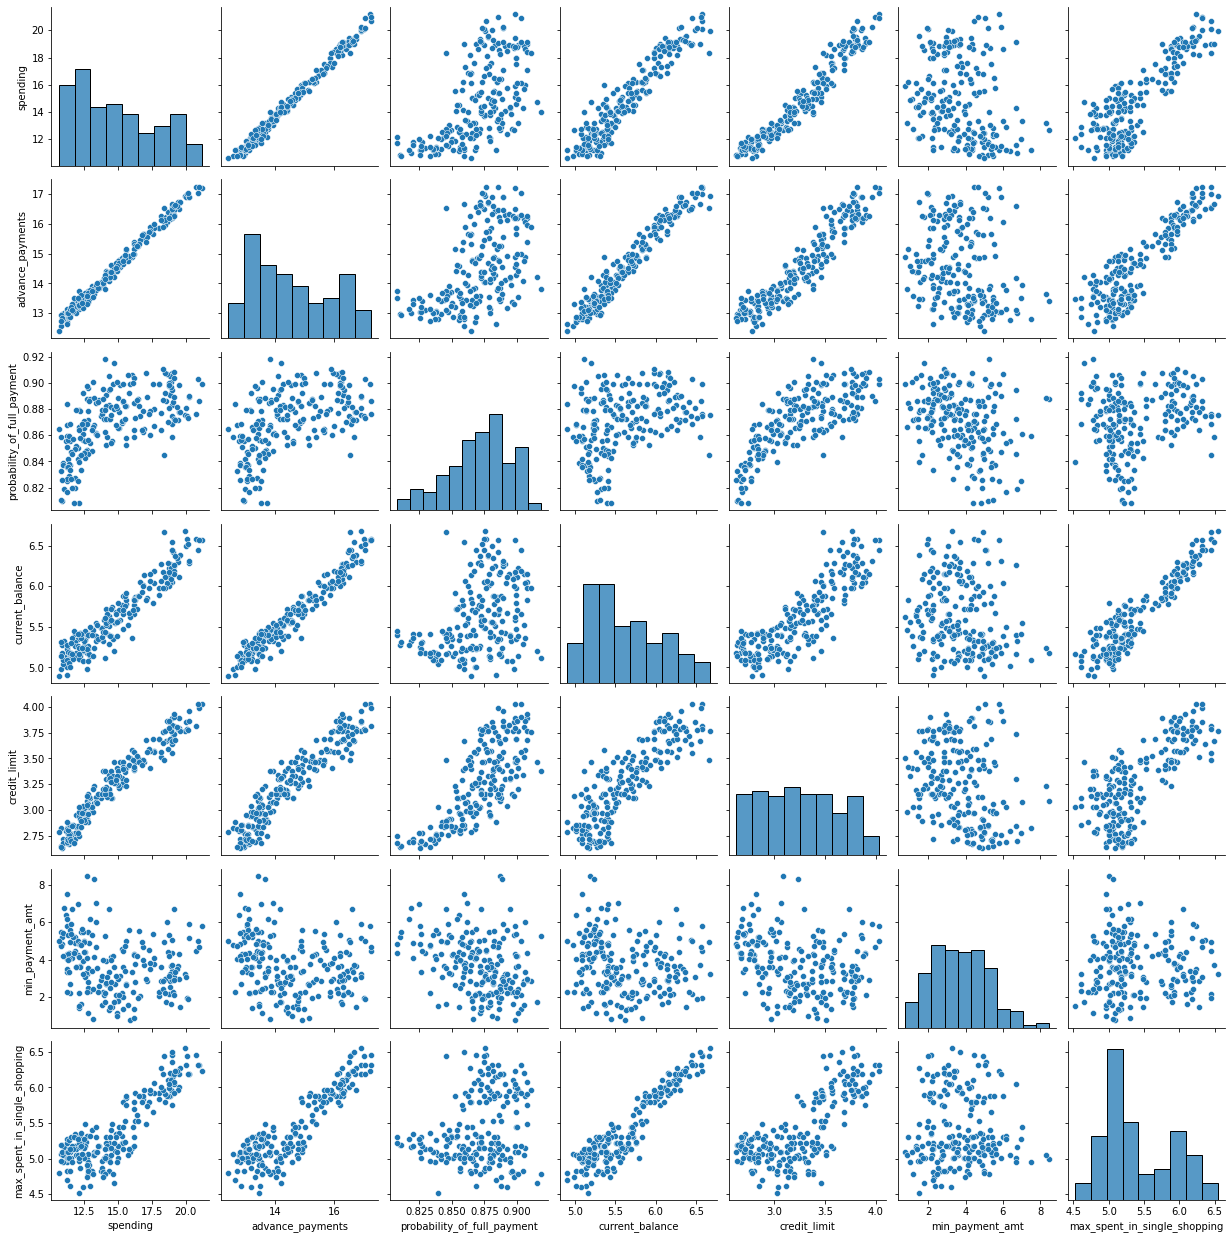

In [637]:
sns.pairplot(bank_df)

- We can observe that most of the attributes have a linear relationship with the others.

In [638]:
corr = bank_df.corr()
round(corr,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


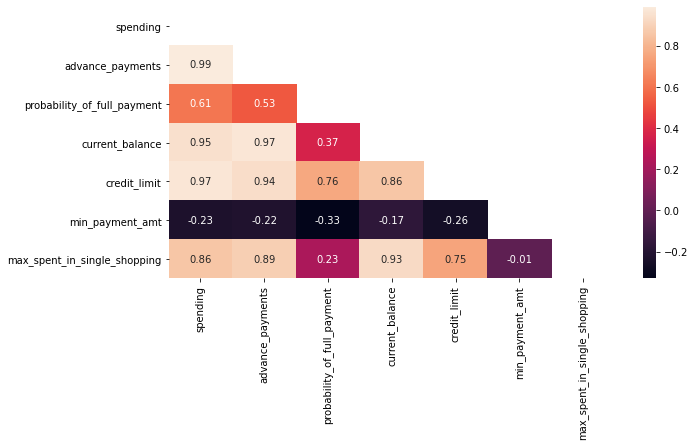

In [639]:
fig_dims = (10,5)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)

- max_spent_in_single_shopping is highly related o=t
- spending and advance payments is highly related to credit limit and current balance
- minimum payment amount is negatively related to all the attributes.

### Insights from EDA

- The dataset was loaded correctly with 210 observation across 7 columns.
- All the atrributes contains numerical data and are of type float.
- There are no missing values present however and also o duplicate entries.
- We found that the probability of customers doing full payment is high
- The max amount spent in single purchase is 5000 on an average.
- As observed, most customers have atleast 4000 to 6000 balance in their card.

### Q 1.2  Do you think scaling is necessary for clustering in this case? Justify

Please refer to project report for justification on why scaling is required for performing clustering on this data.

In [731]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [732]:
# #Scales the data. Essentially returns the z-scores of every attribute
X = StandardScaler()

In [733]:
scaled_df = pd.DataFrame(X.fit_transform(bank_df),columns=bank_df.columns[0:])

In [734]:
scaled_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [735]:
scaled_df2= scaled_df

### Q 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [736]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [737]:
# Choosing ward linking method and applying on scaled data
wardlink = linkage(scaled_df, method = 'ward')

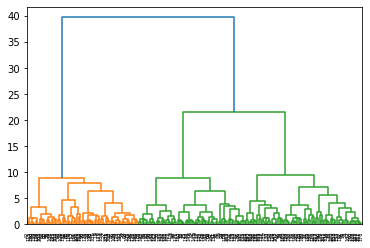

In [738]:
dend = dendrogram(wardlink)

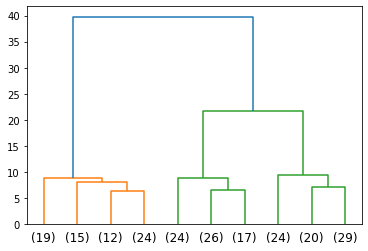

In [650]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [653]:
from scipy.cluster.hierarchy import fcluster

In [740]:
#Method 1

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [739]:
# Method 2

clusters = fcluster(wardlink, 25, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [741]:
bank_df['clusters'] = clusters

In [742]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [743]:
bank_df.clusters.value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

### Using Agglomerative Clustering

In [659]:
from sklearn.cluster import AgglomerativeClustering

In [744]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(scaled_df.iloc[:,:])
print(Cluster_agglo)

[1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1]


In [745]:
bank_df["Agglo_CLusters"]=Cluster_agglo

In [746]:
bank_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Agglo_CLusters'],
      dtype='object')

In [747]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


### Q 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [748]:
from sklearn.cluster import KMeans

In [749]:
# Forming 2 clusters with K=2
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [750]:
# Fit K means on the scaled_df
k_means.fit(scaled_df2)

KMeans(n_clusters=2, random_state=1)

In [751]:
# Cluster outpputs for all observations
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [752]:
# Within Cluster Sum of Squares
k_means.inertia_

659.171754487041

### Forming clusters with K = 1,3,4,5 and comparing the WSS

In [753]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df2)
k_means.inertia_

1469.9999999999998

In [754]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df2)
k_means.inertia_

430.6589731513006

In [755]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df2)
k_means.inertia_

371.38509060801096

In [756]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df2)
k_means.inertia_

327.21278165661346

WSS reduces as K keeps increasing

In [757]:
#Calculating WSS for other values of K - Elbow Method

In [758]:
wss =[] 

In [759]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df2)
    wss.append(KM.inertia_)

In [760]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694]

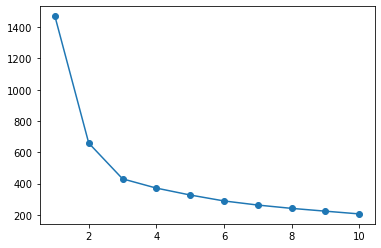

In [761]:
plt.plot(range(1,11), wss, 'o-');

### Calculating Silhouette Score

In [762]:
ss={1:0}
for i in range(2, 10):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
 y=clusterer.fit_predict(scaled_df2)
 # The higher (up to 1) the better
 s =silhouette_score(scaled_df2, y )
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))


The Average Silhouette Score for 2 clusters is 0.46577
The Average Silhouette Score for 3 clusters is 0.40073
The Average Silhouette Score for 4 clusters is 0.32765
The Average Silhouette Score for 5 clusters is 0.28273
The Average Silhouette Score for 6 clusters is 0.2886
The Average Silhouette Score for 7 clusters is 0.28191
The Average Silhouette Score for 8 clusters is 0.26644
The Average Silhouette Score for 9 clusters is 0.25831


### KMeans with K=2

In [763]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df2)
labels2 = k_means.labels_

In [764]:
# Cluster evaluation for 2 clusters: the silhouette score
# Calculating silhouette_score
silhouette_score(scaled_df2,labels2,random_state=1)

0.46577247686580914

Highest silhouette score is for 2 clusters. So, final clusters will be 2

In [765]:
labels2

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [766]:
#Appending Clusters to the original dataset
bank_df["Clus_kmeans2"] = labels2
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters,Clus_kmeans2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


### Q 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

### Profiling of hierarchical clustering data

In [770]:
aggdata=bank_df.drop(["Agglo_CLusters","Clus_kmeans2"],axis=1).groupby('clusters').mean()
aggdata['Freq']=bank_df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,140


#### Profiling of  Agglomerative Clustering

In [772]:
agglo_data=bank_df.drop(["clusters","Clus_kmeans2"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=bank_df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,13.02437,13.726667,0.865112,5.346748,3.042207,3.727979,5.086422,135
1,18.12920,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75


In [773]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters,Clus_kmeans2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


### Cluster Profiling for K-Means

In [774]:
bank_df.Clus_kmeans2.value_counts().sort_index()

0    133
1     77
Name: Clus_kmeans2, dtype: int64

In [776]:
clust_profile=bank_df
clust_profile=clust_profile.drop(["clusters","Agglo_CLusters"],axis=1).groupby('Clus_kmeans2').mean()
clust_profile['freq']=bank_df.Clus_kmeans2.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans2,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77


- Cluster 0: customers with average spending
- Cluster 1: customers with high spending

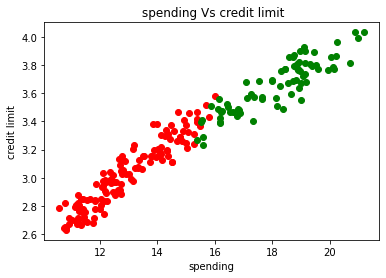

In [781]:
## Visualising the groups

df1 =bank_df[labels2==0]
df2 =bank_df[labels2==1]

plt.scatter(df1['spending'], df1['credit_limit'], color ='red')
plt.scatter(df2['spending'], df2['credit_limit'], color ='green')

plt.xlabel("spending")
plt.ylabel("credit limit");
plt.title(" spending Vs credit limit");

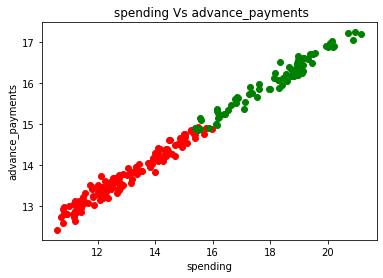

In [782]:
## Visualising the groups

df1 =bank_df[labels2==0]
df2 =bank_df[labels2==1]

plt.scatter(df1['spending'], df1['advance_payments'], color ='red')
plt.scatter(df2['spending'], df2['advance_payments'], color ='green')

plt.xlabel("spending")
plt.ylabel("advance_payments");
plt.title(" spending Vs advance_payments");

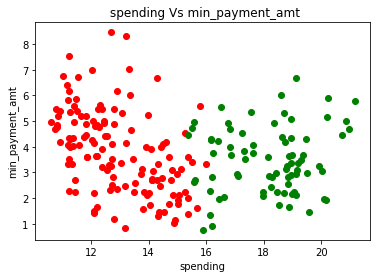

In [783]:
## Visualising the groups

df1 =bank_df[labels2==0]
df2 =bank_df[labels2==1]

plt.scatter(df1['spending'], df1['min_payment_amt'], color ='red')
plt.scatter(df2['spending'], df2['min_payment_amt'], color ='green')

plt.xlabel("spending")
plt.ylabel("min_payment_amt");
plt.title(" spending Vs min_payment_amt");

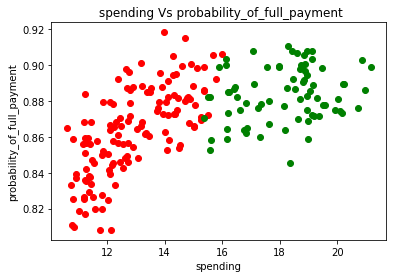

In [784]:
## Visualising the groups

df1 =bank_df[labels2==0]
df2 =bank_df[labels2==1]

plt.scatter(df1['spending'], df1['probability_of_full_payment'], color ='red')
plt.scatter(df2['spending'], df2['probability_of_full_payment'], color ='green')

plt.xlabel("spending")
plt.ylabel("probability_of_full_payment");
plt.title(" spending Vs probability_of_full_payment");

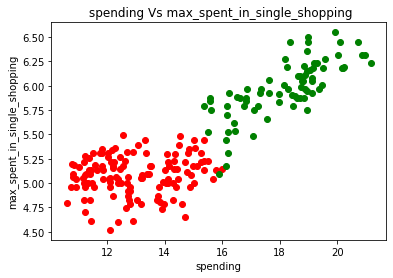

In [785]:
## Visualising the groups

df1 =bank_df[labels2==0]
df2 =bank_df[labels2==1]

plt.scatter(df1['spending'], df1['max_spent_in_single_shopping'], color ='red')
plt.scatter(df2['spending'], df2['max_spent_in_single_shopping'], color ='green')

plt.xlabel("spending")
plt.ylabel("max_spent_in_single_shopping");
plt.title(" spending Vs max_spent_in_single_shopping");

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Q 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Data Description:
The data at hand contains past claim status for tour insurance.

### Domain:
Insurance

### Attribute Information: 

- **Target**: Claim Status (**Claimed**)
- Code of tour firm (**Agency_Code**)
- Type of tour insurance firms (**Type**)
- Distribution channel of tour insurance agencies (**Channel**)
- Name of the tour insurance products (**Product**)
- Duration of the tour (**Duration**)
- Destination of the tour (**Destination**)
- Amount of sales of tour insurance policies (**Sales**)
- The commission received for tour insurance firm (**Commission**)
- Age of insured (**Age**)

In [888]:
# Read the data as a data frame
insurance = pd.read_csv('insurance_part2_data.csv')

In [889]:
#checking the head of the data frame(first 5 rows)
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [788]:
#checking the tail of the data frame(Last 5 rows)
insurance.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


## Basic EDA
* Checking the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Finding the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [789]:
#info about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


- The data has 3000 instances with 10 attributes. 2 integer type, 2 float type and 6 object type(Strings in the column) 

In [790]:
## Checking the number of rows and columns
insurance.shape

(3000, 10)

- The data set contains 30000 observatiosn of data and 10 variables.

In [791]:
# Check for missing value in any colum
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

- There are no null values in any of the columns.

In [890]:
# Are there any duplicates
dups = insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

insurance[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### Removing Duplicates

In [891]:
# We will drop the duplicates assuming that the travel company cannot sell the same kind of tour package to similar demography.
insurance.drop_duplicates(inplace=True)

In [892]:
insurance.shape

(2861, 10)

- Now we have 2861 observations after dropping the duplicate rows.

In [893]:
insurance.Channel.value_counts()  

Online     2815
Offline      46
Name: Channel, dtype: int64

- Here, we can see that the attribute Channel has only 46 values of offline channel and rest all through online.
- Therefore, we can go ahead with dropping this column for further analysis as it won't effect our prediction.

In [894]:
## Dropping the Channel fearure before we go for further analysis as the same will not add any value in model building
insurance.drop(labels='Channel',axis=1,inplace=True)
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,53,18.00,Bronze Plan,ASIA


In [895]:
# five point summary of the data
insurance.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2861,NaN,NaN,NaN,38.2041,10.6781,8,31,36,43,84
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861,NaN,NaN,NaN,15.081,25.8268,0,0,5.63,17.82,210.21
Duration,2861,NaN,NaN,NaN,72.1202,135.977,-1,12,28,66,4580
Sales,2861,NaN,NaN,NaN,61.7579,71.3997,0,20,33.5,69.3,539
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 4 insurance agencies which are divided into two types.
- These agencies are selling 5 types of tour plans for 3 unique destinations.
- Out of 2861 observations 1947 corresponds to tours that have not been claimed.

In [807]:
# five point summary of constinuos data
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


- We can see that the duration of tour has a minimum value of -1.0 which seems to be a problem.
- The age column has individual as young as an 8 years old and also with individual of 84 years age.
- The mean sales by the insurance firms has a value of approx 60.
- on 75% of tours that have been taken in the past, the commission earned for tour insurance firm is as low as 17.2, whereas on one of the tour they have earned 210 as commission.
- There have been tour where the sales were zero.

### Measure of Skewness

In [808]:
import scipy.stats as stats

In [809]:
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance.Age),stats.skew(insurance.Commision),stats.skew(insurance.Duration),stats.skew(insurance.Sales)]},
                        index=['Age','Commision','Duration','Sales'])  
Skewness

,Skewness
Age,1.102566
Commision,3.103113
Duration,13.778867
Sales,2.343413


- Skew of Duration is very high as seen in the previous step
- All variables are skewed to the right with Age being the least skewed

### Data Visualization

#### Plots to see the distribution of the continuous features individually


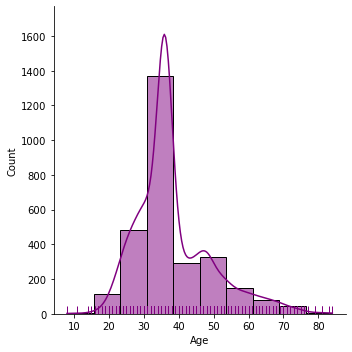

In [813]:
#Plot for Age

sns.displot(insurance['Age'], kde =True, rug =True, color ='purple', bins =10)

- Age attribute looks quite normally distributed.

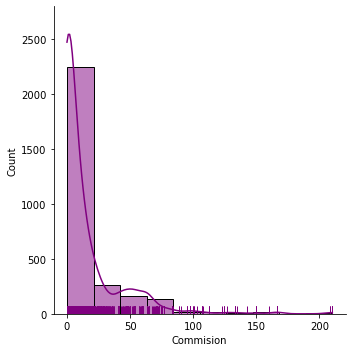

In [814]:
#Plot for Commision

sns.displot(insurance['Commision'], kde =True, rug =True, color ='purple', bins =10)

- commision appears to be right skewed.

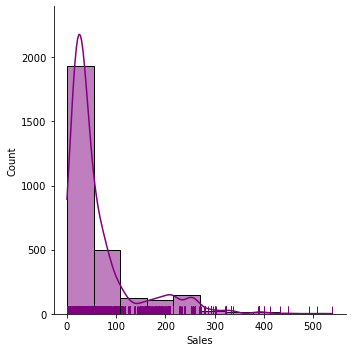

In [815]:
#Plot for Sales

sns.displot(insurance['Sales'], kde =True, rug =True, color ='purple', bins =10)

- Sales appeared to be skewed to the right.

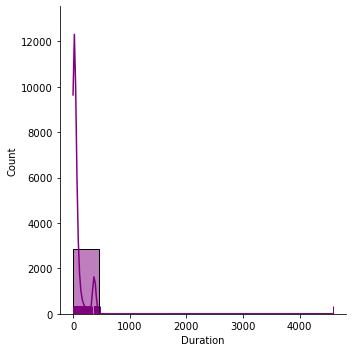

In [816]:
#Plot for Duration

sns.displot(insurance['Duration'], kde =True, rug =True, color ='purple', bins =10)

- duration has some negative value as well.

### We will plot Boxplot to check outliers

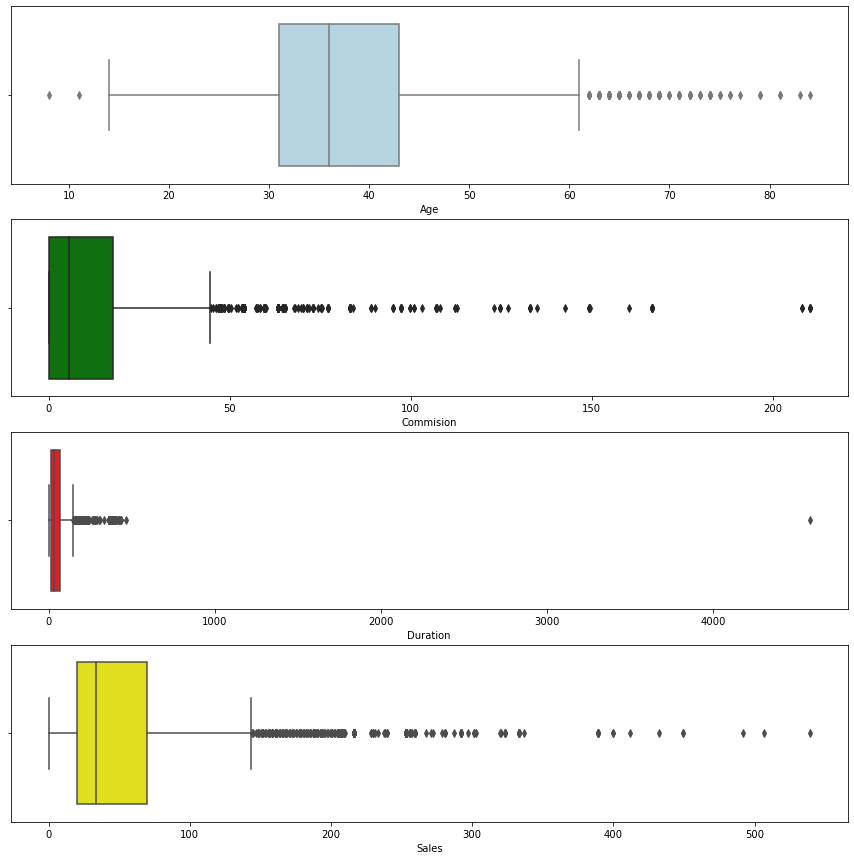

In [817]:
plt.figure(figsize =(15,15))
plt.subplot(4,1,1)
sns.boxplot(x =insurance.Age, color = 'lightblue')

plt.subplot(4,1,2)
sns.boxplot(x =insurance.Commision, color = 'green')

plt.subplot(4,1,3)
sns.boxplot(x =insurance.Duration, color = 'red')

plt.subplot(4,1,4)
sns.boxplot(x =insurance.Sales, color = 'yellow')

plt.show()

- All the variables have high numbers of outliers present in the data.

#### We will not be treating outliers over here.Treating outliers sometimes results in the models having better performance but the models lose out on the generalization.

### Plots to see the distribution of the categorical features individually

- We will plot various count plots to see how the variables has been distributed.

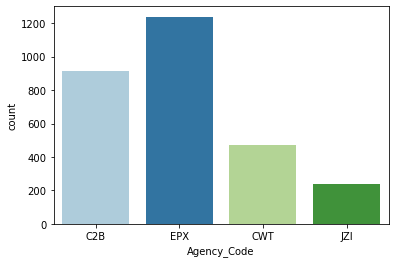

In [818]:
#Countplot for Agency Code
sns.countplot(x='Agency_Code', data=insurance, palette='Paired')

- Most of the tours have been claimed with the agency with code EPX 

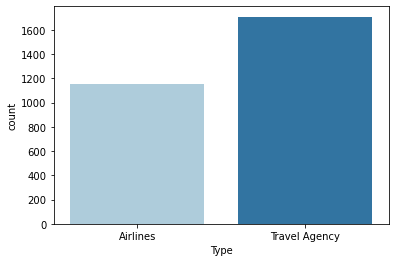

In [819]:
#Countplot for Type
sns.countplot(x='Type', data=insurance, palette='Paired')

- Most claims have been taken from a travel agency insurance firm

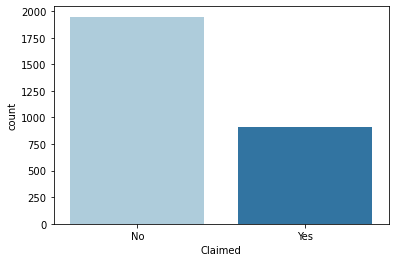

In [820]:
#Countplot for Claimed
sns.countplot(x='Claimed', data=insurance, palette='Paired')

- The insurance agency said that they were getting many claims. But seeing this particular set of data, claimed tours are lesser than the tours that were not claimed.

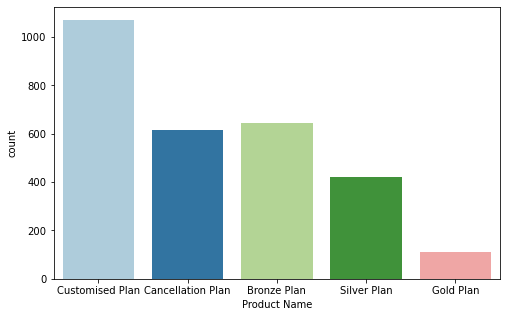

In [821]:
#Countplot for Product Name
plt.figure(figsize =(8,5))
sns.countplot(x='Product Name', data=insurance, palette='Paired')

- Most of the people prefer a customised plan for themselves rather than going for a high-end one like the Gold plan

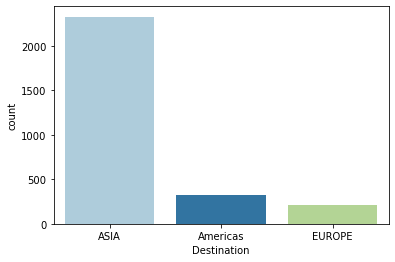

In [823]:
#Countplot for Destination
sns.countplot(x='Destination', data=insurance, palette='Paired')

- There are lesser people who prefer to visit Americas and Europe, maybe because the tours to these places cost a little more than that of tourist places in ASIA

### Bi-variate Analysis

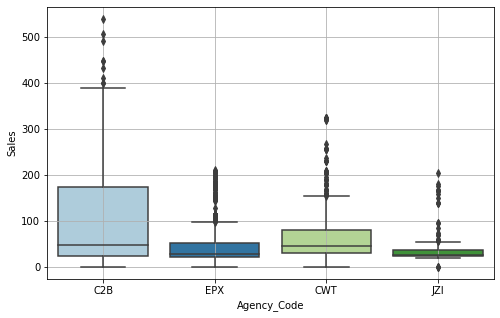

In [824]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Agency_Code", y="Sales", data=insurance, palette= 'Paired')
plt.grid()
plt.show()

- Agency C2B has made the highest sales.

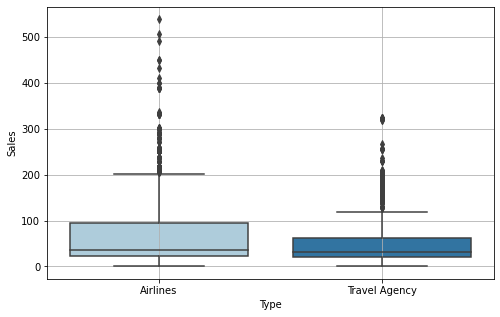

In [899]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Type", y="Sales", data=insurance, palette= 'Paired')
plt.grid()
plt.show()

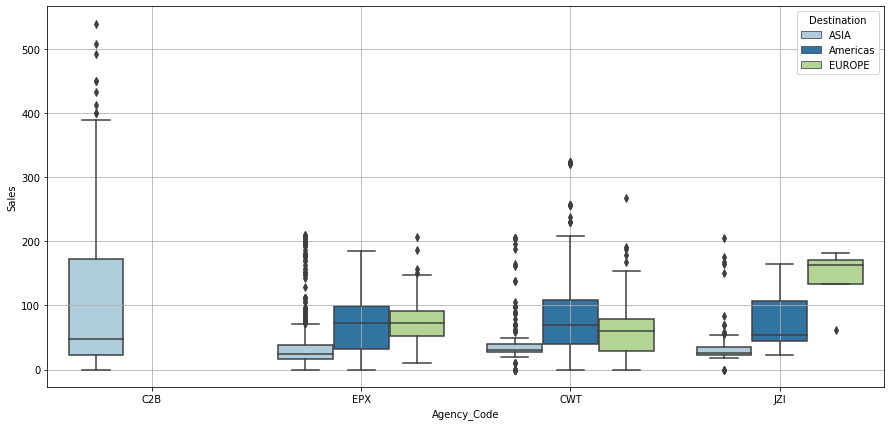

In [825]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Agency_Code", y="Sales", data=insurance,hue='Destination', palette= 'Paired')
plt.grid()
plt.show()

- From this plot, we can very well see that although most of the insurance were taken with the agency code EPX but the Sales were higher for Agency C2B

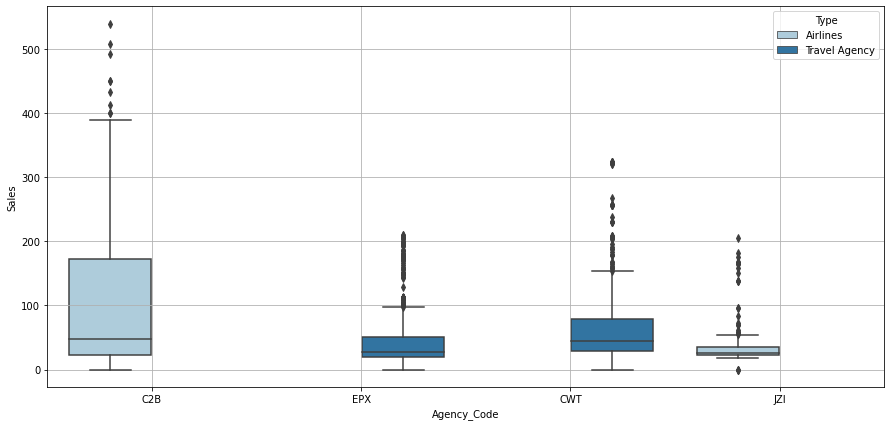

In [896]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Agency_Code", y="Sales", data=insurance,hue='Type', palette= 'Paired')
plt.grid()
plt.show()

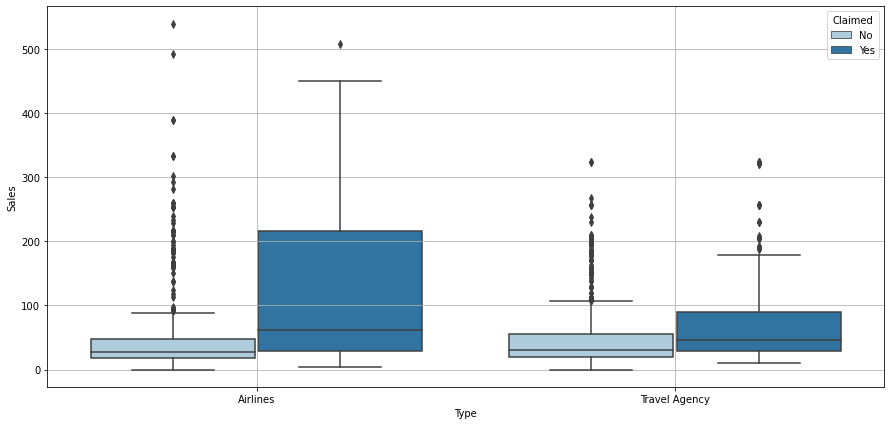

In [898]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Type", y="Sales", data=insurance,hue='Claimed', palette= 'Paired')
plt.grid()
plt.show()

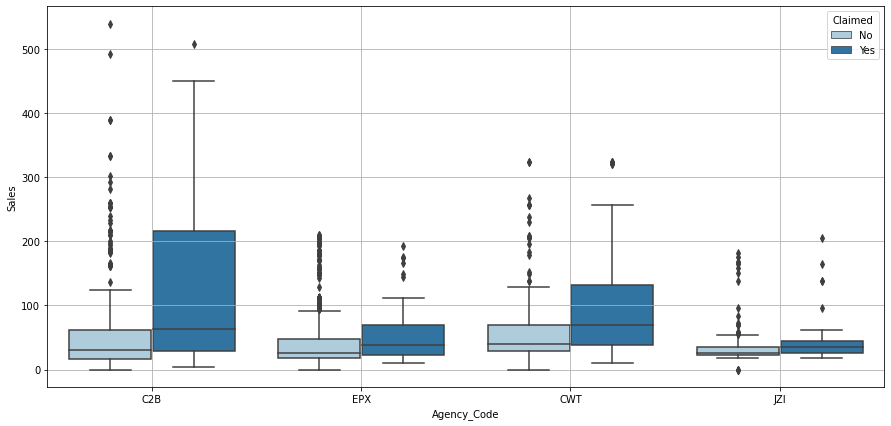

In [900]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Agency_Code", y="Sales", data=insurance,hue='Claimed', palette= 'Paired')
plt.grid()
plt.show()

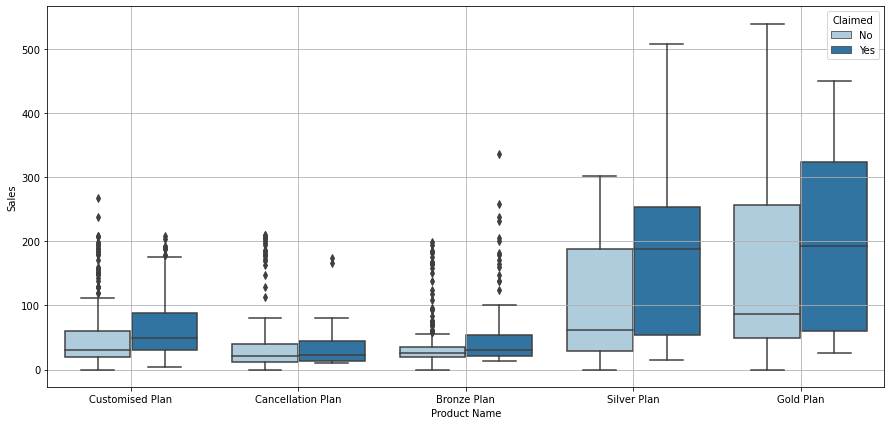

In [901]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Product Name", y="Sales", data=insurance,hue='Claimed', palette= 'Paired')
plt.grid()
plt.show()

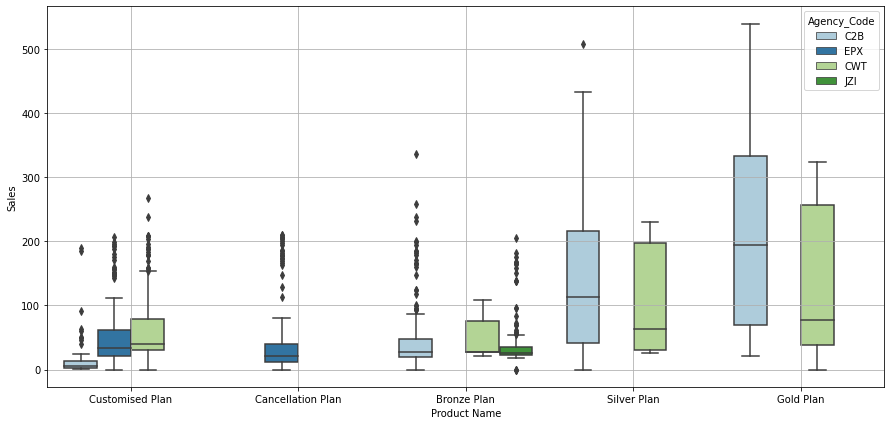

In [826]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Product Name", y="Sales", data=insurance,hue='Agency_Code', palette= 'Paired')
plt.grid()
plt.show()

- The sales were higher for Agency C2B because they were able to sell more of Gold and Silver plan and less of customised plan.
- The agency EPX focused on customized and cancellation plans more and focused on quantity rather than the amount of product.

In [827]:
# Creating crosstabs for numerical and categorical data

pd.pivot_table(insurance,'Sales', index=['Product Name', 'Agency_Code'],
                     columns=[ 'Destination'])

Destination                          ASIA    Americas      EUROPE
Product Name      Agency_Code                                    
Bronze Plan       C2B           41.002506         NaN         NaN
                  CWT           27.818182         NaN   77.500000
                  JZI           31.332740   76.375000  141.750000
Cancellation Plan EPX           28.532137   54.366197   56.312500
Customised Plan   C2B           18.231333         NaN         NaN
                  CWT           38.496575   71.234459   63.324468
                  EPX           38.537964   85.580645   87.797636
Gold Plan         C2B          212.603333         NaN         NaN
                  CWT           73.722222  260.579412   83.100000
Silver Plan       C2B          139.098030         NaN         NaN
                  CWT           65.455556  196.580000   47.000000

- The agency C2B has got insurance sales for only ASIA as a destination with higher sales for gold and silver plans.
- The cancellation plans were only sold by agency EPX.
- Agency CWT is average in selling all plans other than cancellation plan.
- Agency JZI has sold only Bronze plans for all the three continents as destinations.

### MultiVariate Analysis

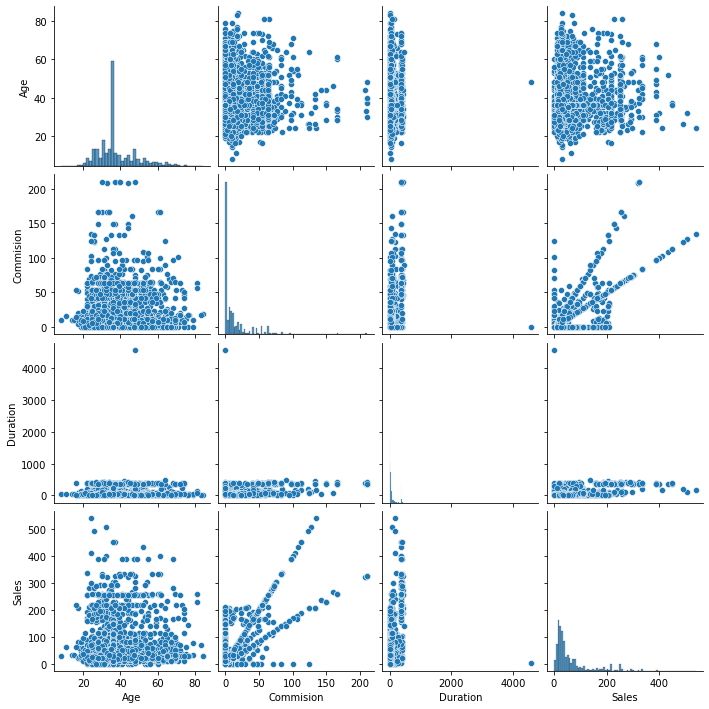

In [828]:
sns.pairplot(insurance)

- We can see that commision and sales are highly related to each other

In [829]:
corr = insurance.corr()
round(corr,2)

,Age,Commision,Duration,Sales
Age,1.00,0.06,0.03,0.04
Commision,0.06,1.00,0.46,0.76
Duration,0.03,0.46,1.00,0.55
Sales,0.04,0.76,0.55,1.00


-As seen in above pairplot also, corrrelation is highest between commision and sales.

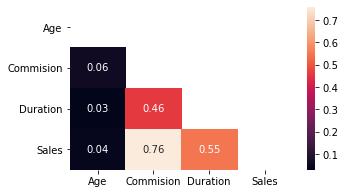

In [830]:
fig_dims = (5,3)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)

- Commision and Sales are highly correlated

### Insights from EDA

- The dataset was loaded correctly with 3000 observation across 10 columns.
- There were 2 columns(Age, Duration)of integer type, 2 columns(Commision, Sales) of float type and 6 columns(Agency_Code, Type, Channel, Claimed, Product Name and Destination) of type object(categorical).
- There are no missing values present however we found 139 duplicate entries, as the travel company cannot sell the same kind of tour package to similar demography.
- After dropping the duplicates we are left with 2861 entries.
- We found that commision and Sales are highly related
- Agency C2B has made the highest sales mostly by selling Gold and Silver Plans
- Agency EPX did not sell Gold and Silver Plans and had the most number of insurance taken through other plans.
- Agency CWT is average in selling all plans other than cancellation plan.
- Agency JZI has sold only Bronze plans for all the three continents as destinations.
- We have dropped Channel attribute for our furter analysis as there were only 46 entries of offline claims which would not effect our prediction.


### Q 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [831]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [835]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object':
        insurance[feature] = pd.Categorical(insurance[feature]).codes 

In [836]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Duration      2861 non-null   int64  
 6   Sales         2861 non-null   float64
 7   Product Name  2861 non-null   int8   
 8   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 205.7 KB


In [837]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,7,2.51,2,0
1,36,2,1,0,0.00,34,20.00,2,0
2,39,1,1,0,5.94,3,9.90,2,1
3,36,2,1,0,0.00,4,26.00,1,0
4,33,3,0,0,6.30,53,18.00,0,0


In [838]:
# capture the Claimed column ("default") into separate vectors for training set and test set

X = insurance.drop(["Claimed"] , axis=1)

y = insurance.pop("Claimed")


In [839]:
X.head()

,Age,Agency_Code,Type,Commision,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,7,2.51,2,0
1,36,2,1,0.00,34,20.00,2,0
2,39,1,1,5.94,3,9.90,2,1
3,36,2,1,0.00,4,26.00,1,0
4,33,3,0,6.30,53,18.00,0,0


In [840]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [841]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [842]:
X_train

,Age,Agency_Code,Type,Commision,Duration,Sales,Product Name,Destination
1300,69,0,0,6.00,7,15.0,0,0
2332,36,2,1,0.00,29,35.0,2,0
900,60,1,1,41.58,8,69.3,2,1
207,36,0,0,9.75,70,39.0,4,0
2310,36,2,1,0.00,39,51.0,1,2
...,...,...,...,...,...,...,...,...
2894,27,2,1,0.00,19,20.0,2,0
929,36,2,1,0.00,30,42.0,2,0
1132,36,2,1,0.00,15,13.0,1,0
236,36,2,1,0.00,9,112.0,2,0


In [843]:
X_test

,Age,Agency_Code,Type,Commision,Duration,Sales,Product Name,Destination
642,31,1,1,0.00,402,97.0,2,0
219,68,2,1,0.00,60,29.0,1,0
1685,42,0,0,21.00,11,84.0,4,0
962,44,1,1,23.76,51,39.6,2,0
800,50,1,1,35.64,111,59.4,2,0
...,...,...,...,...,...,...,...,...
2948,19,1,1,10.50,32,30.0,2,0
2203,45,2,1,0.00,37,22.0,2,0
445,51,0,0,4.00,5,16.0,0,0
2964,53,2,1,0.00,13,21.0,2,0


In [849]:
train_labels

1300    1
2332    1
900     0
207     1
2310    0
       ..
2894    0
929     0
1132    0
236     0
1097    0
Name: Claimed, Length: 2002, dtype: int8

In [850]:
test_labels

642     0
219     0
1685    0
962     0
800     1
       ..
2948    0
2203    0
445     0
2964    0
2055    1
Name: Claimed, Length: 859, dtype: int8

### Decision Tree Classifier

In [844]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [845]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [846]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)


X_train (2002, 8)
X_test (859, 8)
train_labels (2002,)
test_labels (859,)


In [847]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insurance_Tree_File = open('d:\insurance_treee.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

In [369]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6,7, 8],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [30,45, 60]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [370]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [30, 45, 60]})

In [371]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 45}

In [372]:
best_gridCART = grid_search.best_estimator_

C:\Users\deept\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


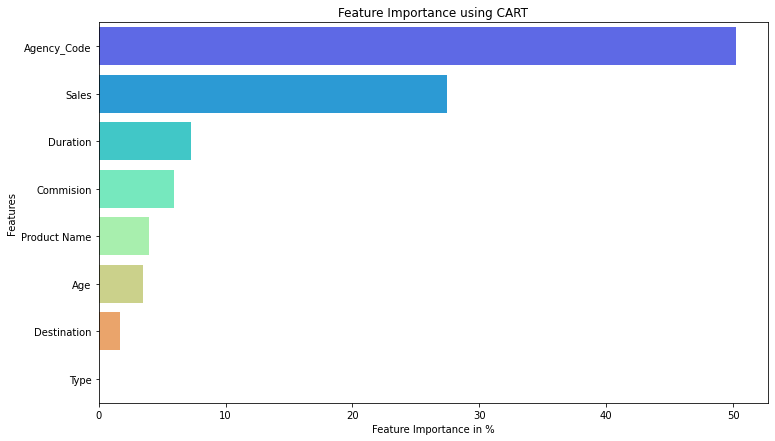

In [449]:
x=pd.DataFrame(best_gridCART.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using CART')
plt.show()

In [848]:
print (pd.DataFrame(best_gridCART.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.502370
Sales         0.274335
Duration      0.072834
Commision     0.059044
Product Name  0.039621
Age           0.035198
Destination   0.016598
Type          0.000000


### Random Forest Classifier

In [853]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [15,20],
    'min_samples_split': [50,60,70],
    'n_estimators': [81,101, 201]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [854]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [15, 20],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [81, 101, 201]})

In [855]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 81}

In [856]:
best_gridRF = grid_search.best_estimator_

C:\Users\deept\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


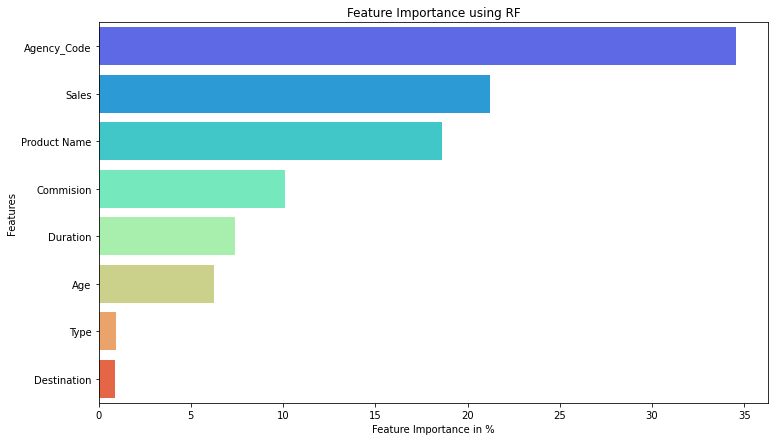

In [857]:
x=pd.DataFrame(best_gridRF.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [858]:
print (pd.DataFrame(best_gridRF.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.345646
Sales         0.212144
Product Name  0.186234
Commision     0.101176
Duration      0.073964
Age           0.062596
Type          0.009513
Destination   0.008727


### MLP Classifier (Artificial Neural Network)

In [859]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [860]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100), 100],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [861]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100), 100],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [862]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [863]:
best_gridANN= grid_search.best_estimator_

### Q 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

## CART Model

### Confusion Matrix , AUC and RUC  for the training data

In [404]:
from sklearn.metrics import classification_report,confusion_matrix

In [423]:
#Predicting Train and Test data with the CART Model
ytrain_predictCART = best_gridCART.predict(X_train)
ytest_predictCART = best_gridCART.predict(X_test)

In [865]:
#Train Accuracy
cart_train_acc=best_gridCART.score(X_train,train_labels)
cart_train_acc

0.7892107892107892

In [411]:
cm_train = confusion_matrix(train_labels, ytrain_predictCART)

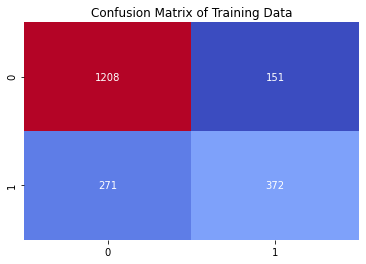

In [412]:
sns.heatmap(cm_train, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Training Data');

In [414]:
print(classification_report(train_labels, ytrain_predictCART))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.71      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [866]:
cart_metrics=classification_report(train_labels, ytrain_predictCART,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.71
cart_train_recall  0.58
cart_train_f1  0.64


AUC: 0.837


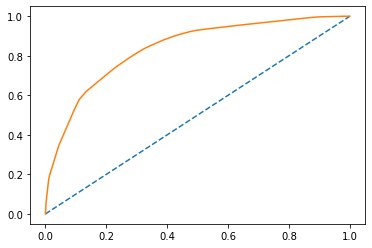

In [882]:
# predict probabilities
probs = best_gridCART.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### Confusion Matrix for test data

In [409]:
cm_test =confusion_matrix(test_labels, ytest_predictCART)

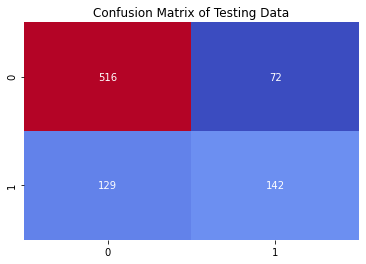

In [415]:
sns.heatmap(cm_test, annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Testing Data');

In [867]:
#Test Data Accuracy
cart_test_acc=best_gridCART.score(X_test,test_labels)
cart_test_acc

0.7660069848661234

In [417]:
print(classification_report(test_labels, ytest_predictCART))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       588
           1       0.66      0.52      0.59       271

    accuracy                           0.77       859
   macro avg       0.73      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



In [868]:
cart_metrics=classification_report(test_labels, ytest_predictCART,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.66
cart_test_recall  0.52
cart_test_f1  0.59


AUC: 0.791


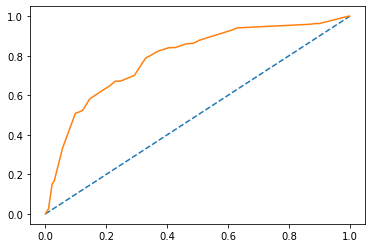

In [883]:
# predict probabilities
probs = best_gridCART.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Conclusion on CART Model

- Accuracy on Training Data is 78.92 %
- Accuracy on Test Data is 76.60 %


- AUC Score on Training Data is 83.7 %
- AUC Score on Test Data is 79.1 %

- Accuracy, AUC, Precision and Recall of test data are almost inline with the Training data.

## Random Forest Model

### Confusion Matrix , AUC and RUC  for the training data

In [421]:
#Predicting Train and Test data with the RF Model
ytrain_predictRF = best_gridRF.predict(X_train)
ytest_predictRF = best_gridRF.predict(X_test)

In [869]:
#Train Accuracy
rf_train_acc=best_gridRF.score(X_train,train_labels)
rf_train_acc

0.7942057942057942

In [396]:
from sklearn.metrics import confusion_matrix,classification_report

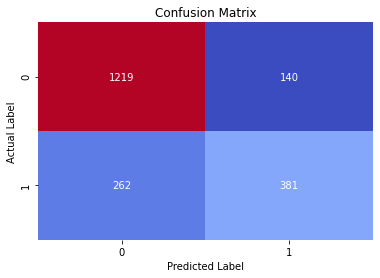

In [425]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predictRF)
sns.heatmap(confusion_matrix(train_labels,ytrain_predictRF),annot=True, fmt='d',cbar=False, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [398]:
print(classification_report(train_labels,ytrain_predictRF))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1359
           1       0.73      0.59      0.65       643

    accuracy                           0.80      2002
   macro avg       0.78      0.74      0.76      2002
weighted avg       0.79      0.80      0.79      2002



In [870]:
rf_metrics=classification_report(train_labels, ytrain_predictRF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.73
rf_train_recall  0.59
rf_train_f1  0.65


Area under Curve is 0.8502260719104364


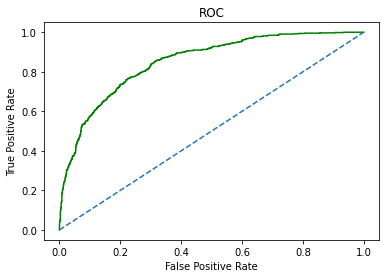

In [881]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_gridRF.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_gridRF.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### Confusion Matrix , AUC and RUC  for the test data

In [871]:
#Test Accuracy 
rf_test_acc=best_gridRF.score(X_test,test_labels)
rf_test_acc

0.7823050058207218

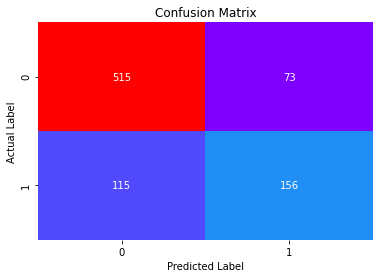

In [430]:
#confusion matrix on the test data
confusion_matrix(test_labels,ytest_predictRF)
sns.heatmap(confusion_matrix(test_labels,ytest_predictRF),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [401]:
print(classification_report(test_labels,ytest_predictRF))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.68      0.58      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.73       859
weighted avg       0.77      0.78      0.78       859



In [872]:
rf_metrics=classification_report(test_labels, ytest_predictRF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.58
rf_test_f1  0.62


Area under Curve is 0.8143779652082235


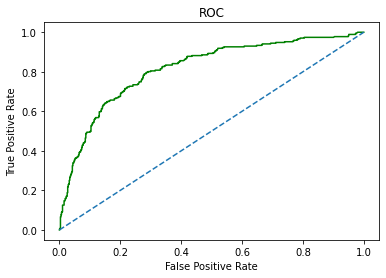

In [880]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_gridRF.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_gridRF.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

### Conclusions on Random Forest Model

- Accuracy on Training Data is 79.92 %
- Accuracy on Test Data is 78.11 %


- AUC Score on Training Data is 85.06 %
- AUC Score on Test Data is 81.44 %

- Accuracy, AUC, Precision and Recall of test data are almost inline with the Training data.

## ANN Model

### Confusion Matrix , AUC and RUC  for the training data

In [435]:
ytrain_predictANN = best_gridANN.predict(X_trains)
ytest_predictANN = best_gridANN.predict(X_tests)

In [873]:
#Train Accuracy
nn_train_acc=best_gridANN.score(X_trains,train_labels)
nn_train_acc

0.7612387612387612

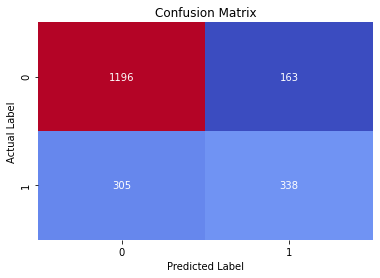

In [437]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predictANN)
sns.heatmap(confusion_matrix(train_labels,ytrain_predictANN),annot=True, fmt='d',cbar=False, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [438]:
print(classification_report(train_labels,ytrain_predictANN))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1359
           1       0.67      0.53      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



In [874]:
nn_metrics=classification_report(train_labels, ytrain_predictANN,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.53
nn_train_f1  0.59


Area under Curve is 0.8016157475593274


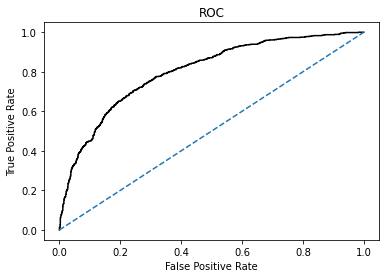

In [879]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_gridANN.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_gridANN.predict_proba(X_trains)[:,1])
print('Area under Curve is', nn_train_auc)

### Confusion Matrix , AUC and RUC  for the test data

In [875]:
#Test Accuracy 
nn_test_acc=best_gridANN.score(X_tests,test_labels)
nn_test_acc

0.770663562281723

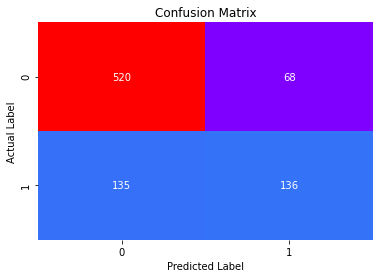

In [441]:
#confusion matrix on the test data
confusion_matrix(test_labels,ytest_predictANN)
sns.heatmap(confusion_matrix(test_labels,ytest_predictANN),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [442]:
print(classification_report(test_labels,ytest_predictANN))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       588
           1       0.67      0.50      0.57       271

    accuracy                           0.76       859
   macro avg       0.73      0.69      0.70       859
weighted avg       0.75      0.76      0.75       859



In [876]:
nn_metrics=classification_report(test_labels, ytest_predictANN,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8050179481386651


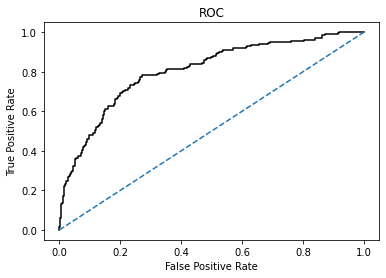

In [878]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_gridANN.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_gridANN.predict_proba(X_tests)[:,1])
print('Area under Curve is', nn_test_auc)

### Conclusions on ANN Model

- Accuracy on Training Data is 76.62 %
- Accuracy on Test Data is 76.36 %


- AUC Score on Training Data is 80.30 %
- AUC Score on Test Data is 80.40 %

- Accuracy, AUC, Precision and Recall of test data are too much close to that of the training data. It seems to be a case of over fitting.

### Q 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

### Comparison of the performance metrics from the 3 models

In [884]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.79,0.78,0.76,0.77
AUC,0.84,0.79,0.85,0.81,0.80,0.81
Recall,0.58,0.52,0.59,0.58,0.53,0.50
Precision,0.71,0.66,0.73,0.68,0.67,0.67
F1 Score,0.64,0.59,0.65,0.62,0.59,0.57


### ROC Curve for the 3 models on the Training data

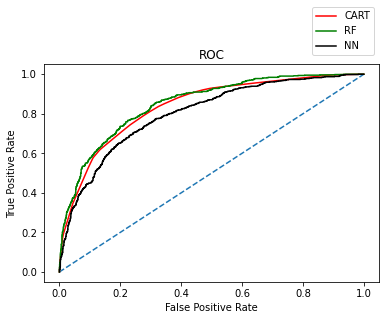

In [885]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

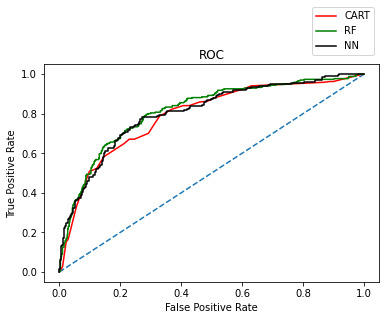

In [886]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Q 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

- Refer to Business Report

### ThankYou!!